In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [94]:
url='https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv'
df=pd.read_csv(url)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


 **Whta we are doing here ?** ARIMA and Seasonal ARIMA Autoregressive Integrated Moving Averages The general process for ARIMA models is the following:

(a)Visualize the Time Series Data (b)Make the time series data stationary (c)Plot the Correlation and AutoCorrelation Charts (d)Construct the ARIMA Model or Seasonal ARIMA based on the data (e)Use the model to make predictions

In [95]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [96]:
df.columns=['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [97]:
df.drop([106,105], axis=0, inplace=True)

In [98]:

df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [99]:
df['Month']=pd.to_datetime(df['Month'])

In [100]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [101]:
df.set_index('Month', inplace=True)

In [102]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Figure size 720x864 with 0 Axes>

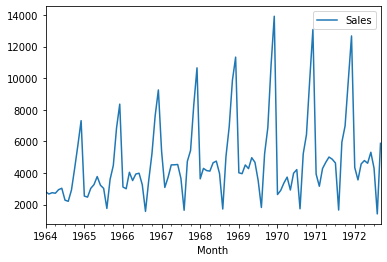

In [103]:
plt.figure(figsize=(10,12))
df.plot()
plt.show()

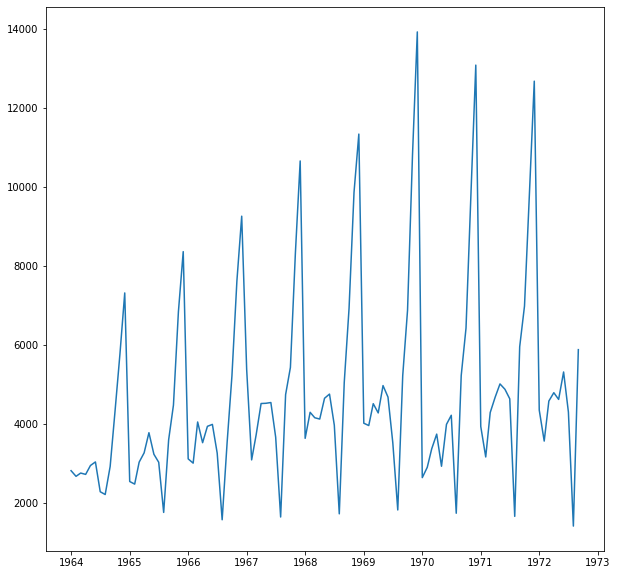

In [104]:
plt.figure(figsize=(10,10))
plt.plot(df)
plt.show()

In [105]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


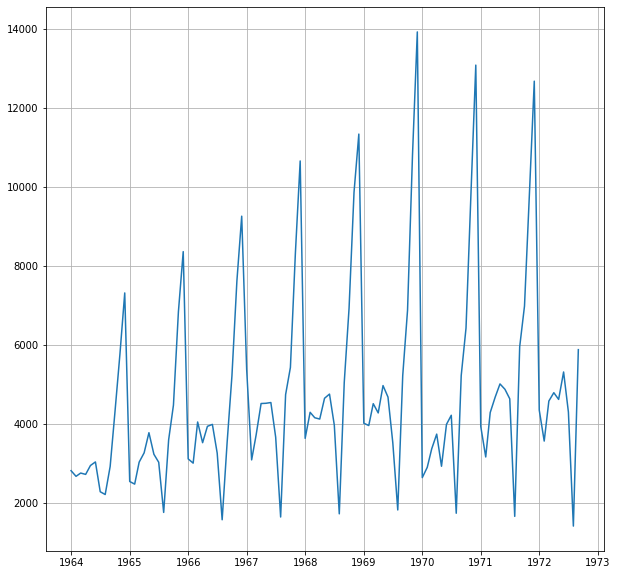

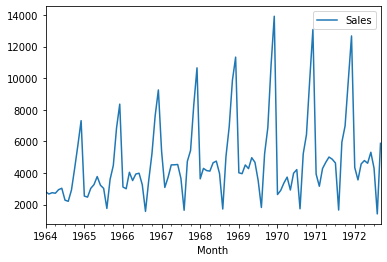

In [106]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(df)
df.plot.line()
plt.show()

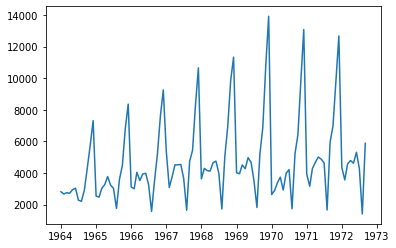

In [107]:
plt.plot(df)

COnverting into log pot so that we can see the treads


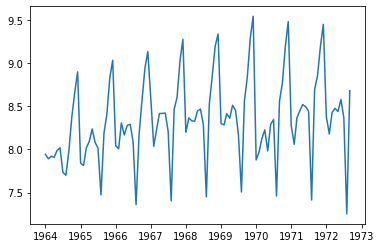

In [108]:
dff=np.log(df)
dff
plt.plot(dff)
plt.show()

**We see that the log curve trend is same as that of the normal curve**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


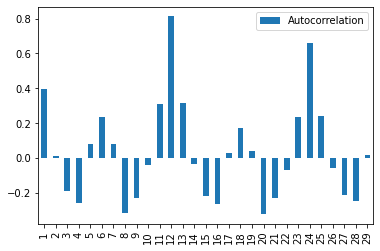

In [109]:
acf_1=acf(dff)[1:30]
test_df=pd.DataFrame([acf_1]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


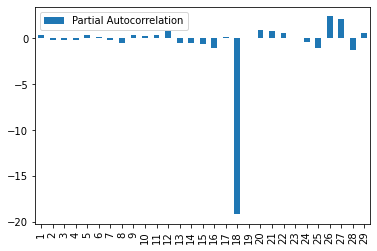

In [110]:
pacf_1=pacf(dff)[1:30]
test_df=pd.DataFrame([pacf_1]).T
test_df.columns=["Partial Autocorrelation"]
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

In [111]:
dff.head()

,Sales
Month,
1964-01-01,7.942718
1964-02-01,7.890583
1964-03-01,7.921173
1964-04-01,7.908755
1964-05-01,7.988204


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


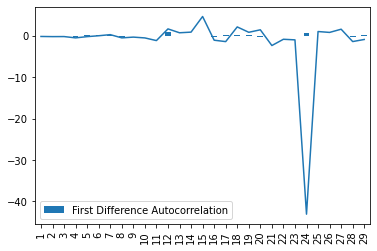

In [112]:

df_diff=dff-dff.shift()
diff=df_diff.dropna()
acf_1_diff=acf(diff)[1:30]
test_df=pd.DataFrame([acf_1_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
pacf_1_diff=pacf(diff)[1:30]
plt.plot(pacf_1_diff)
plt.show()

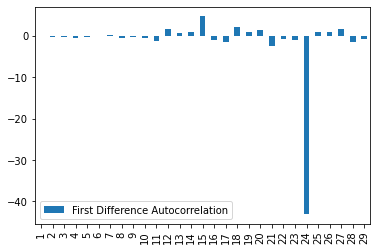

In [113]:
test_df=pd.DataFrame([pacf_1_diff]).T
test_df.columns=['First Difference Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -80.997
Method:                           css   S.D. of innovations              0.527
Date:                Tue, 22 Dec 2020   AIC                            165.994
Time:                        09:11:36   BIC                            171.282
Sample:                    02-01-1964   HQIC                           168.136
                         - 09-01-1972                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.052      0.137      0.891      -0.094       0.108


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


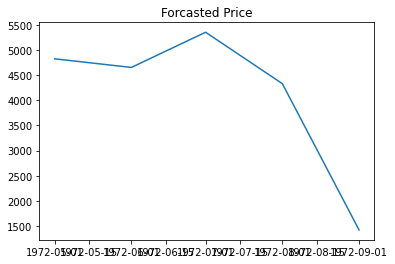

In [114]:
#price_matrix=dff.as_matrix()
model=ARIMA(dff,order=(0,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(100,104, typ='levels')
predictions
pred=np.exp(predictions)
pred
plt.plot(pred)
plt.title("Forcasted Price")
plt.show()

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
model=ARIMA(df['Sales'], order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [117]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 22 Dec 2020   AIC                           1910.251
Time:                        09:11:38   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
df['sales_First_difference']=df['Sales']-df['Sales'].shift(1)

In [119]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [120]:
df['Seasonal_first_diff']=df['Sales']-df['Sales'].shift(12)

In [121]:
df.head(14)

,Sales,sales_First_difference,Seasonal_first_diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


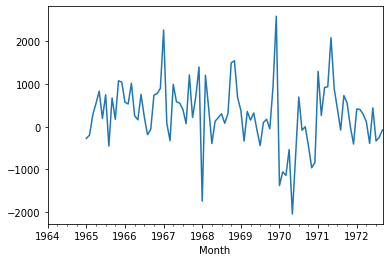

In [122]:
df['Seasonal_first_diff'].plot()

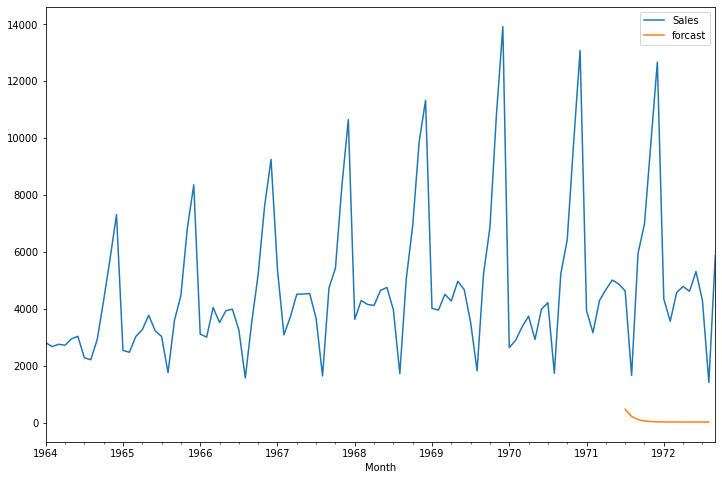

In [123]:
df['forcast']=model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forcast']].plot(figsize=(12,8))

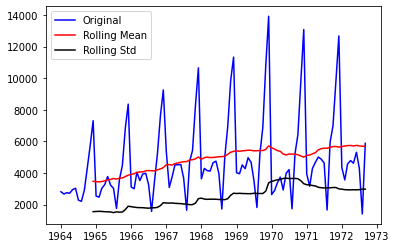

In [124]:
rolling_mean=df['Sales'].rolling(window=12).mean()
rolling_std=df['Sales'].rolling(window=12).std()

plt.plot(df['Sales'], color="blue", label="Original")
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_std, color="black", label="Rolling Std")
plt.legend(loc='best')
plt.show()

In [125]:
result=adfuller(df['Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('critaical value:')
for key, value in result[4].items():
  print('\t{}: {}'.format(key, value))


ADF Statistic: -1.8335930563276193
p-value:0.36391577166024686
critaical value:
	1%: -3.502704609582561
	5%: -2.8931578098779522
	10%: -2.583636712914788


As p-Values is greater than the threshold value (0.05) . We can conclude that the time series is not ststionary 

**Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases**

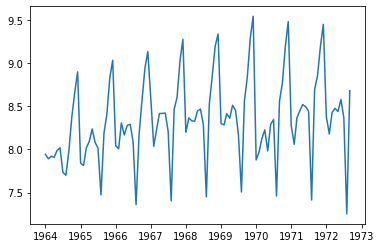

In [126]:
df_log=np.log(df['Sales'])
plt.plot(df_log)

Let’s create a function to run the two tests which determine whether a given time series is stationary.

In [143]:
def get_stationary(timeseries):
  #rolling statistics
  rolling_mean=timeseries.rolling(window=12).mean()
  rolling_std=timeseries.rolling(window=12).std()

  #rolling statistic plotting
  original=plt.plot(timeseries, color='blue', label='Original')
  mean=plt.plot(rolling_mean, color='red', label='Roling Mean')
  std=plt.plot(rolling_std, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rollong Mean & Std')
  plt.show(block=False)

  #Dickey-Fuller Test
  result=adfuller(timeseries)
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value:{}'.format(result[1])) 
  print('critaical value:')
  for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

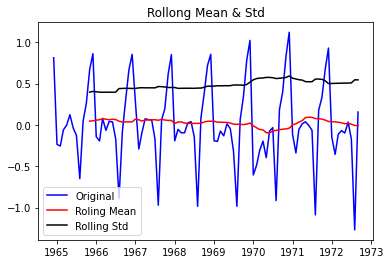

ADF Statistic: -1.7505384023610386
p-value:0.4052794763544446
critaical value:
	1%: -3.5137900174243235
	5%: -2.8979433868293945
	10%: -2.5861907285474777


In [144]:
rolling_mean=df_log.rolling(window=12).mean()
df_log_minus_mean=df_log-rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationary(df_log_minus_mean)


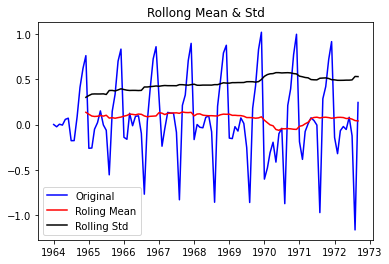

ADF Statistic: -1.5773400457648712
p-value:0.4949655451740947
critaical value:
	1%: -3.50434289821397
	5%: -2.8938659630479413
	10%: -2.5840147047458037


In [146]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationary(df_log_exp_decay)

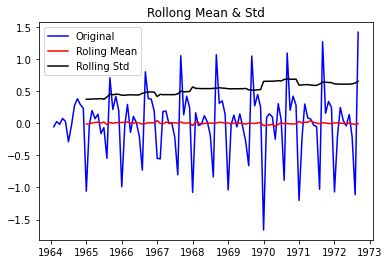

ADF Statistic: -4.460914465253655
p-value:0.0002312140464953381
critaical value:
	1%: -3.50434289821397
	5%: -2.8938659630479413
	10%: -2.5840147047458037


In [148]:
df_log_shift=df_log-df_log.shift()
df_log_shift.dropna(inplace=True)

get_stationary(df_log_shift)

AS we can see that Exponential decay performed worse than subtracting the rolling mean. However, it is still more stationary than the original. 

As we can see the above calculation p-value is less than 0.05 , hence we can conclude that the above time series is stationary.
(Let’s try one more method to determine whether an even better solution exists. When applying time shifting, we subtract every the point by the one that preceded it.
null, (x1−x0), (x2−x1), (x3−x2), (x4−x3), …, (xn−xn−1))

**Auto Regressive Mode**
AutoRegressive Model (AR)
Autoregressive models operate under the premise that past values have an effect on current values. AR models are commonly used in analyzing nature, economics, and other time-varying processes. As long as the assumption holds, we can build a linear regression model that attempts to predict value of a dependent variable today, given the values it had on previous days.
Image for post
The order of the AR model corresponds to the number of days incorporated in the formula.

**Moving Average Model (MA)**
Assumes the value of the dependent variable on the current day depends on the previous days error terms. The formula can be expressed as:
Image for post
You’ll also come across the equation written as:
Image for post
where μ is the mean of the series, the θ1, …, θq are the parameters of the model and the εt, εt−1,…, εt−q are white noise error terms. The value of q is called the order of the MA model.

**Auto Regressive Moving Average (ARMA)**
The ARMA model is simply the combination of the AR and MA models.


**AutoRegressive Integrated Moving Average Model (ARIMA)**
The ARIMA (aka Box-Jenkins) model adds differencing to an ARMA model. Differencing subtracts the current value from the previous and can be used to transform a time series into one that’s stationary. For example, first-order differencing addresses linear trends, and employs the transformation zi = yi — yi-1. Second-order differencing addresses quadratic trends and employs a first-order difference of a first-order difference, namely zi = (yi — yi-1) — (yi-1 — yi-2), and so on.

Three integers (p, d, q) are typically used to parametrize ARIMA models.
p: number of autoregressive terms (AR order)
d: number of nonseasonal differences (differencing order)
q: number of moving-average terms (MA order)

**Auto Correlation Function (ACF)**
The correlation between the observations at the current point in time and the observations at all previous points in time. We can use ACF to determine the optimal number of MA terms. The number of terms determines the order of the model.


**Partial Auto Correlation Function (PACF)**As the name implies, PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points. We can use PACF to determine the optimal number of terms to use in the AR model. The number of terms determines the order of the model.

we can create and fit an ARIMA model with AR of order 2, differencing of order 1 and MA of order 2.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


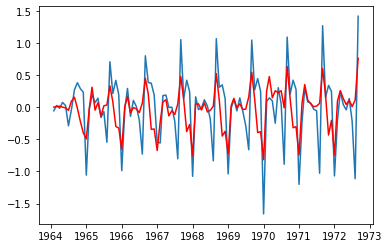

In [151]:
decomposition=seasonal_decompose(df_log)
model=ARIMA(df_log, order=(2,1,2))
result=model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(result.fittedvalues,color='red')


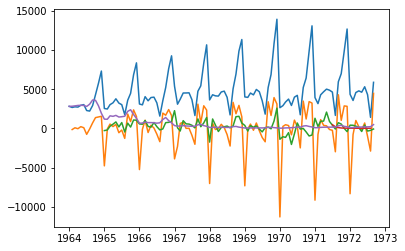

In [154]:
predictions_ARIMA_diff = pd.Series(result.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log.iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

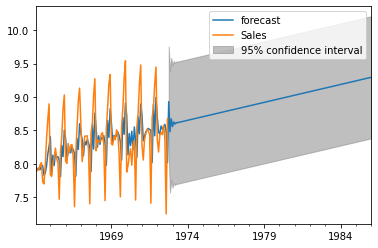

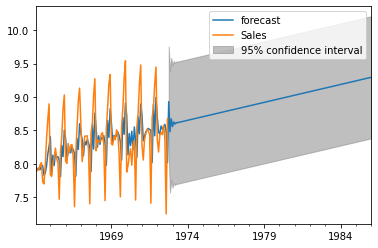

In [155]:
result.plot_predict(1,264)
